<h1>Did above-average rains contribute to the disaster in Brumadinho?</h1>
<h3>Analysis of the possible impact of rainfalls on the rupture of Brumadinho's dam</h3>

<br>
<br>

On January 25, 2019, Dam I of Vale’s Córrego do Feijão mine in Brumadinho collapsed. At the time it burst, it was holding 11.7m cubic metres of iron ore tailings, or almost 5,000 Olympic-sized swimming pools, and stood 86m high<sup><a href="#link1">[1]</a></sup>. The rupture gave rise to one of the greatest human and environmental disasters in the history of Brazil. One year later, 259 people had been found dead and 11 were still missing<sup><a href="#link2">[2]</a></sup>.

In its 2017 _"Mine Tailing Storage: Safety is no Accident"_ report<sup><a href="#link3">[3]</a></sup>, the United Nations states that heavy and prolonged rains, hurricanes and earthquakes can even be triggers for disruptions and overflows, but even in these cases the UN considers that there was an error since the risk planning for the construction and maintenance of the dam must take into account the climatic conditions of the site. About the report, Alex Bastos, professor of geology at the Federal University of Espírito Santo and member of the UN committee on ore dams, summarizes: "The conclusion of the study is that there are two reasons that cause disruptions: error in the risk analysis and negligence in the maintenance of the dam. That is, if there was a torrential rain that caused the dam to overflow, there was an error in the risk analysis. If the region is subject to rain like this, the structure of the dam should be different. It has to be accurate."<sup><a href="#link4">[4]</a></sup>

According to an independent report<sup><a href="#link5">[5]</a></sup> commissioned by the company, released in December 2019, one of the factors identified as a cause of the tragedy was an increase in the amount of rain in the region. “The Panel concluded that the sudden strength loss and resulting failure of the marginally stable dam were due to a critical combination of ongoing internal strains due to creep, and a strength reduction due to loss of suction in the unsaturated zone caused by the intense rainfall towards the end of 2018. This followed a number of years of increasing rainfall after tailings deposition ceased in July 2016.”, the report said.

Anyway, before analyzing the participation of the precipitation factor in the disaster, we need to ask ourselves: were there, in fact, above average rains that could have impacted the rupture of the Brumadinho dam? That is the question that we will try to answer in this article in Jupyter Notebook format.

## Analyzed Data

To conduct our study, publicly available data sets in the National Water Resources Information System (SNIRH) of the National Water Agency (ANA) and in CEMADEN (National Center for Natural Disaster Monitoring and Alerts), agencies of the Brazilian government, were used to collect information on precipitation in the vicinity of the dam and to analyze if there was any abnormal pattern of rain that could have contributed to the disaster.  

* <a href="http://www.snirh.gov.br/hidroweb/rest/api/documento/convencionais?tipo=3&documentos=2044008" target="_blank">Melo Franco station data from ANA's SNIRH<sup>[6]</sup></a>
* <a href="http://www.cemaden.gov.br/mapainterativo/download/downpluv.php" target="_blank">CEMADEN stations data<sup>[7]</sup></a>

The surrounding meteorological stations were reduced to the 6 closest to the dam, varying from 5.47 to 1.34 miles in distance, so that the data of the nearest station that were available in each period were always used (in the case of CEMADEN stations). In the following map it is possible to see the geographical position of ANA's Melo Franco station (blue dot), CEMADEN's Aranha, Alberto Flores, Centro, Córrego do Feijão and Casa Branca District stations (green dots) and the dam site (x in red).

In [1]:
import matplotlib.pyplot as plt
import mplleaflet

plt.figure(figsize=(6, 6))

# ANA's station
plt.plot(-44.120881, -20.197752, 'bo', ms=10)   # Melo Franco (02044008) [8,81 km (5.47 mi)]

# CEMADEN's stations
# plt.plot(-44.2, -20.143, 'go', ms=10)     # Centro (310900601A) [8,98 km (5.58 mi)]
# plt.plot(-44.216, -20.146, 'go', ms=10)   # Progresso (310900602A) [10,67 km (6.63 mi)]
plt.plot(-44.047, -20.094, 'go', ms=10)   # Casa Branca district (310900603A) [7,91 km (4.92 mi)]
# plt.plot(-44.023, -20.165, 'go', ms=10)   # Prefeito Maciel street (310900604A) [11,18 km (6.95 mi)]
plt.plot(-44.107, -20.135, 'go', ms=10)   # Córrego do Feijão (310900605A) [2,16 km (1.34 mi)]
# plt.plot(-44.2009, -20.1409, 'go', ms=10) # Rio Paraopeba (310900605H) [9,00 km (5.59 mi)]
plt.plot(-44.147, -20.156, 'go', ms=10)   # Alberto Flores (310900606A) [5,14 km (3.19 mi)]
plt.plot(-44.198, -20.142, 'go', ms=10)   # Centro (310900607A) [8,74 km (5.43 mi)]
plt.plot(-44.105, -20.196, 'go', ms=10)   # Aranha (310900608A) [8,72 km (5.42 mi)]
# plt.plot(-44.227, -20.12, 'go', ms=10)    # Inhotim (310900609A) [11,38 km (7.07 mi)]

# Dam I
plt.plot(-44.118047, -20.118579, 'rX', ms=10)
    
mplleaflet.display()

Since data come from different sources, the formats and dispositions of the files are quite different and will need specific handling. The data for each ANA station is consolidated into a single CSV file, which has some headers and captions that will need to be ignored. CEMADEN data, on the other hand, are divided by city and month, that is, although a file contains data from all stations in the city, several files are needed to analyze a period of several years.

Below is a preview of two of these files:

In [2]:
from IPython.display import display, Pretty

# ANA's Melo Franco station data (first 50 file lines)
display(Pretty(filename ='data/chuvas_C_02044008[sample].csv'))

Sistema de Informações Hidrológicas
Versão Web 3.0
© 2018 Agência Nacional de Águas (ANA)

NivelConsistencia: 1 = Bruto, 2 = Consistido
TipoMedicaoChuvas: 1 = Pluviômetro, 2 = Pluviógrafo, 3 = Data logger
Status: 0 = Branco, 1 = Real, 2 = Estimado, 3 = Duvidoso, 4 = Acumulado

Restrições da consulta:
Código da Estação:02044008


EstacaoCodigo;NivelConsistencia;Data;TipoMedicaoChuvas;Maxima;Total;DiaMaxima;NumDiasDeChuva;MaximaStatus;TotalStatus;NumDiasDeChuvaStatus;TotalAnual;TotalAnualStatus;Chuva01;Chuva02;Chuva03;Chuva04;Chuva05;Chuva06;Chuva07;Chuva08;Chuva09;Chuva10;Chuva11;Chuva12;Chuva13;Chuva14;Chuva15;Chuva16;Chuva17;Chuva18;Chuva19;Chuva20;Chuva21;Chuva22;Chuva23;Chuva24;Chuva25;Chuva26;Chuva27;Chuva28;Chuva29;Chuva30;Chuva31;Chuva01Status;Chuva02Status;Chuva03Status;Chuva04Status;Chuva05Status;Chuva06Status;Chuva07Status;Chuva08Status;Chuva09Status;Chuva10Status;Chuva11Status;Chuva12Status;Chuva13Status;Chuva14Status;Chuva15Status;Chuva16Status;Chuva17Status;Chuva18Status;Ch

In [3]:
# CEMADEN's stations data for January 2014 in Brumadinho (first 50 file lines)
display(Pretty(filename ='data/3277_MG_2014_1[sample].csv'))

municipio;codEstacao;uf;nomeEstacao;latitude;longitude;datahora;valorMedida
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 00:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 01:41:09;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 02:40:29;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 03:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 04:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 05:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 06:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 07:40:38;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 08:40:28;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 09:40:29;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 10:40:27;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,216;01/01/2014 11:40:30;0
BRUMADINHO;310900602A;MG;Progresso;-20,146;-44,2

## Data Wrangling

Our final objective is to consolidate, in a single DataFrame by dataset, the accumulated rainfall per month, so that we can create visualizations that allow us to make our analysis. ANA's data already have a monthly consolidation and are all arranged in a single file, so let's start with it.

A brief inspection shows us some details that we will need to take into account when telling Pandas how to load this file:

* the separator is ';' and not ',' as the default for CSV files
* the first 12 lines are a kind of legend that we will need to ignore
* the numbers are using Brazilian standard, with a comma separating the decimals, which is also not Pandas standard
* lastly, we could already indicate which column to use as an index for the rows, but as we will need to do some treatments on it too, for now we will load the file with the standard index

That said, we can load our data like this:

In [4]:
import pandas as pd

# For the sake of performance, Pandas by default truncates the total rows and columns to be displayed.
# The following lines modify this setting and instruct the library to display more or less data.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

"""
Here we use _ as the name of our DataFrame being processed. Although _ is a valid Python variable name,
it is generally not good practice in software engineering to name a variable with such a generic name. However,
as we will see later, many operations require frequent repetition of the DataFrame name, which can make the lines
very long, so we’ll use this trick to keep the lines of code as short as possible until we’ve finished cleaning
and processing our data.
"""

_ = pd.read_csv('data/chuvas_C_02044008.csv', decimal=',', index_col=False, sep=';', skiprows=12)
_

,EstacaoCodigo,NivelConsistencia,Data,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
0,2044008,1,01/07/2019,1,5.1,7.3,3.0,2.0,1,1,1,NaN,0,0.0,0.0,5.1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1,2044008,1,01/06/2019,1,11.0,11.4,4.0,2.0,1,1,1,NaN,0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2,2044008,1,01/05/2019,1,23.9,47.7,15.0,3.0,1,1,1,NaN,0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.9,22.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
3,2044008,1,01/04/2019,1,35.5,82.1,6.0,8.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,0.2,35.5,0.5,0.0,3.0,2.8,0.0,0.0,0.0,0.0,0.0,13.3,22.7,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
4,2044008,1,01/03/2019,1,37.8,120.8,11.0,8.0,1,1,1,NaN,0,27.3,2.2,0.0,0.0,0.0,3.4,0.0,0.0,0.0,11.3,37.8,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,11.0,27.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
5,2044008,1,01/02/2019,1,37.3,207.6,17.0,13.0,1,1,1,NaN,0,0.0,0.0,0.0,26.4,8.5,12.5,6.2,5.3,0.0,0.0,0.0,0.0,0.0,20.7,0.0,7.0,37.3,9.6,7.9,0.0,13.1,0.0,0.0,0.0,0.0,0.0,27.8,25.3,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.0
6,2044008,1,01/01/2019,1,20.0,47.6,5.0,6.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,20.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.4,2.2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
7,2044008,1,01/12/2018,1,38.9,193.8,25.0,15.0,1,1,1,NaN,0,28.0,20.4,18.4,0.5,0.0,0.2,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,0.0,0.0,0.3,0.0,8.6,38.9,5.3,29.4,17.3,14.4,6.4,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
8,2044008,1,01/11/2018,1,28.4,172.7,9.0,12.0,1,1,1,NaN,0,0.0,4.3,0.0,0.0,0.0,0.0,5.0,26.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,7.4,19.4,22.4,23.6,0.0,4.1,26.7,4.0,0.0,0.0,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
9,2044008,1,01/10/2018,1,33.0,101.9,25.0,9.0,1,1,1,NaN,0,5.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,10.2,0.0,0.0,0.0,21.1,0.0,0.0,16.0,0.3,0.0,0.0,0.0,0.0,33.0,9.1,1.7,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0


What really interests us is in the 'Data' and 'Total' columns. They tell us how much it rained each month in the region of Melo Franco station. So let's cut out this data to get a more detailed view. First, however, let's transform the data in the 'Data' column so that Pandas can work with this information in a time format.

In [5]:
_['Data'] = pd.to_datetime(_['Data'], dayfirst=True)
_[['Data','Total']]

,Data,Total
0,2019-07-01,7.3
1,2019-06-01,11.4
2,2019-05-01,47.7
3,2019-04-01,82.1
4,2019-03-01,120.8
5,2019-02-01,207.6
6,2019-01-01,47.6
7,2018-12-01,193.8
8,2018-11-01,172.7
9,2018-10-01,101.9


In a perfect world the data would almost ready, but for a better quality in our results, we have to pay attention to two other points:

1. From the beginning of 1941 to the end of 2019 there is a total of 948 months, but we have more than 1700 lines in our DataFrame, which means we have repeated dates.
2. In the file legend, in addition to 'NivelConsistencia' and 'TipoMedicaoChuvas', there is also the definition of 'Status' and not all values are useful to us.

We will start with the treatment of repeated dates. In fact, if we analyze it carefully, the dates are repeated but with different levels of consistency (indicated in the column 'NivelConsistencia'). A quick look at ANA website reveals what this means:
> "The analysis of consistency of rainfall data should aim to identify and correct errors, as well as to fill in faults in the rainfall series."<sup><a href="#link8">[8]</a></sup>

Therefore, "consisted data" are those that have already undergone this analysis and correction of possible failures. So, whenever possible, we will give priority to data that is already consisted ('NivelConsistencia' = 2), we will do this by creating a Boolean mask that when applied will filter the lines and return only the version with the highest level of consistency for each date. We will also create another mask to remove data after January 2019.

Finally, let's take the opportunity to sort the data in ascending order by date and transform our 'Data' column into the index of our DataFrame.

In [6]:
mask1 = _.groupby(['Data'])['NivelConsistencia'].transform(max) == _['NivelConsistencia']
mask2 = (_['Data'].dt.year < 2019) | ((_['Data'].dt.year == 2019) & (_['Data'].dt.month == 1))

_ = _[mask1 & mask2].sort_values('Data')
_.set_index('Data', inplace=True)
_

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1941-07-01,2044008,2,1,16.5,20.4,19.0,NaN,1,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.5,0.0,1.8,16.5,0.0,0.0,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-08-01,2044008,2,1,1.2,1.2,18.0,1.0,1,1,1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-09-01,2044008,2,1,NaN,8.1,NaN,NaN,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1941-10-01,2044008,2,1,42.0,83.1,17.0,5.0,1,1,1,NaN,0,0.0,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,42.0,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1941-11-01,2044008,2,1,52.9,184.5,7.0,10.0,1,1,1,NaN,0,13.6,5.4,0.0,0.0,0.0,0.0,52.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.9,0.0,0.0,0.0,0.0,5.1,0.0,0.0,20.4,23.4,21.1,6.3,22.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
1941-12-01,2044008,2,1,38.0,245.5,4.0,20.0,1,1,1,NaN,0,17.1,17.4,3.1,38.0,2.1,0.0,4.1,0.0,0.0,13.3,2.0,0.0,0.0,4.0,0.0,0.0,0.0,8.4,15.0,0.0,11.4,0.0,36.2,3.1,0.0,3.2,1.9,17.6,14.3,31.3,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1942-01-01,2044008,2,1,67.1,287.2,21.0,13.0,1,1,1,1487.0,2,2.0,0.0,0.0,1.2,39.3,21.1,10.4,4.0,44.0,14.2,44.3,18.1,0.0,0.0,0.0,0.0,16.4,0.0,0.0,0.0,67.1,0.0,0.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1942-02-01,2044008,2,1,NaN,182.4,NaN,NaN,0,2,0,1487.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1942-03-01,2044008,2,1,23.2,125.9,9.0,10.0,1,1,1,1487.0,2,22.4,13.3,0.0,3.1,11.1,0.0,0.0,0.0,23.2,10.3,16.4,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.3,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0


We solved the first point, the problem of status remains. First, let's see how much of each status we have for the data that is meaningful to us:

In [7]:
_['TotalStatus'].value_counts()

1    888
2     37
0      3
3      2
Name: TotalStatus, dtype: int64

The first good news is that we do not have status 4 ('Accumulated') for 'Total', which makes sense since this is already a cumulative measure. Another is the fact that only 42 of the 930 entries are not in the status we want, which represents less than 5% of the sample. Since we want to generate a series of averages, it makes sense to give up the data with great uncertainty (status 2 and 3) to prevent them from contaminating our sample and consequently distorting our results.

However, three entries are with status 0, which means an inconsistency. Let's see:

In [8]:
_[_['TotalStatus'] == 0]

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,16.0,0.0,24.1,6.3,26.1,2.4,24.9,0.0,0.0,0.0,2.4,26.5,11.9,0.0,0.0,0.0,0.0,0.0,1.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2011-12-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,6.9,1.5,47.7,0.0,0.0,0.0,2.2,38.5,1.5,0.4,19.6,0.0,2.5,0.0,71.4,34.2,55.0,37.4,50.2,24.9,0.0,0.0,18.9,0.0,0.0,0.0,31.5,21.8,18.3,5.8,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2014-10-01,2044008,1,1,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2.4,1.2,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,12.9,73.5,0.0,0.0,0.0,0.0,6.9,18.0,9.1,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0


For some reason, the 'Total' column was not correctly measured but all daily measurements are present and, better, they all have status 1, indicating that they are real measurements. These inconsistencies would probably be corrected when the data were consisted (note that 'NivelConsistencia' is 1 for these lines), but luckily we have enough data to do this ourselves.

In [9]:
# Updating 'Total' e 'TotalStatus'
# Note that if any of the days had a status other than 1, our 'TotalStatus' would also be different
_.at['2011-10-01', 'Total'] = _.loc['2011-10-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2011-10-01', 'TotalStatus'] = _.loc['2011-10-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()
_.at['2011-12-01', 'Total'] = _.loc['2011-12-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2011-12-01', 'TotalStatus'] = _.loc['2011-12-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()
_.at['2014-10-01', 'Total'] = _.loc['2014-10-01'].filter(regex=("Chuva[0-9]{2}$")).sum().round(1)
_.at['2014-10-01', 'TotalStatus'] = _.loc['2014-10-01'].filter(regex=("Chuva[0-9]{2}Status$")).max()

_.loc[[pd.to_datetime('2011-10-01'), pd.to_datetime('2011-12-01'), pd.to_datetime('2014-10-01')]]

,EstacaoCodigo,NivelConsistencia,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-01,2044008,1,1,NaN,160.6,NaN,NaN,0,1.0,0,NaN,0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,16.0,0.0,24.1,6.3,26.1,2.4,24.9,0.0,0.0,0.0,2.4,26.5,11.9,0.0,0.0,0.0,0.0,0.0,1.4,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2011-12-01,2044008,1,1,NaN,490.2,NaN,NaN,0,1.0,0,NaN,0,6.9,1.5,47.7,0.0,0.0,0.0,2.2,38.5,1.5,0.4,19.6,0.0,2.5,0.0,71.4,34.2,55.0,37.4,50.2,24.9,0.0,0.0,18.9,0.0,0.0,0.0,31.5,21.8,18.3,5.8,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0
2014-10-01,2044008,1,1,NaN,157.6,NaN,NaN,0,1.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2.4,1.2,14.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,12.9,73.5,0.0,0.0,0.0,0.0,6.9,18.0,9.1,0.0,0.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0


Great! Now we can get rid of the inaccurate measures and reduce the DataFrame to a Series that contains only the column that is really meaningful to us, finishing the treatment for this dataset.

In [10]:
df_ana = _[_['TotalStatus'] == 1]['Total'].rename('ANA')
df_ana.index.name = None
df_ana

1941-07-01     20.4
1941-08-01      1.2
1941-10-01     83.1
1941-11-01    184.5
1941-12-01    245.5
1942-01-01    287.2
1942-03-01    125.9
1942-04-01     46.9
1942-05-01     44.3
1942-06-01      3.5
              ...  
2018-04-01     21.7
2018-05-01      5.6
2018-06-01      0.0
2018-07-01      0.0
2018-08-01     39.2
2018-09-01     92.4
2018-10-01    101.9
2018-11-01    172.7
2018-12-01    193.8
2019-01-01     47.6
Name: ANA, Length: 891, dtype: float64

Now we are going to clean and process data from CEMADEN stations. As previously stated, this data is arranged in several files, so we will have to use a new library to go through all these files and consolidate the data in a single DataFrame. Right after loading, in addition to the treatment for the separator, decimal and index, we will already define which columns we want to load. The ideal is to restrict the data to just what we need whenever possible, as this decreases the amount of memory and cpu required to handle the data.

In the previous case, as we only had one file, it was easier to check the format in which the information was recorded, but now we are dealing with a dataset divided into more than 60 files and by inspecting only one of them is not possible to have this guarantee. Therefore, by concatenating the data from each file, we will preserve the original index and take advantage of that to print the first line from each one, checking if everything is as expected.

In [11]:
from glob import glob

pd.set_option('display.max_rows', 70)

df1 = pd.concat([pd.read_csv(f,
                             sep=';',
                             index_col=False,
                             decimal=',',
                             usecols=['codEstacao','datahora','valorMedida']) for f in glob('data/3277_MG_*.csv')])

df1.loc[0]

,codEstacao,datahora,valorMedida
0,310900602A,01/01/2014 00:40:28,0
0,310900602A,01/10/2014 00:00:00,0
0,310900602A,01/11/2014 00:00:00,0
0,310900602A,01/12/2014 00:00:00,0
0,310900602A,01/01/2014 00:40:28,0
0,310900607A,01/02/2014 00:30:27,0
0,310900608A,01/03/2014 00:00:00,0
0,310900604A,01/04/2014 00:00:00,0
0,310900604A,01/05/2014 00:00:00,0
0,310900603A,01/06/2014 00:00:00,0


It was good that we were careful because, from what we see, the way of recording the data has changed over time. In fact, if we look line by line, we can identify three distinct patterns:

1. Until March 2015, both dates and values were using the Brazilian standard (day/month/year and decimals separated by commas)
2. In April, May, June and July 2015, the dates are in international format and the values are with decimals separated by periods
3. As of August 2015, the dates remain using the international standard but the values are recorded again using the Brazilian standard

Knowing this, we can rename the files so that the names distinguish the pattern used in each one, this way we'll be able to load them independently to make the necessary treatment.

In [12]:
df_br_date = pd.concat([pd.read_csv(f,
                                    sep=';',
                                    index_col=False,
                                    decimal=',',
                                    usecols=['codEstacao','datahora','valorMedida']) for f in glob('data/renamed/_3277_MG_*.csv')],
                       ignore_index=True)

df_dot_decimal = pd.concat([pd.read_csv(f,
                                        sep=';',
                                        index_col=False,
                                        usecols=['codEstacao','datahora','valorMedida']) for f in glob('data/renamed/dot_3277_MG_*.csv')],
                           ignore_index=True)

df_us_date = pd.concat([pd.read_csv(f,
                                    sep=';',
                                    index_col=False,
                                    decimal=',',
                                    usecols=['codEstacao','datahora','valorMedida']) for f in glob('data/renamed/3277_MG_*.csv')],
                       ignore_index=True)

df_br_date['datahora'] = pd.to_datetime(df_br_date['datahora'], dayfirst=True)
df_dot_decimal['datahora'] = pd.to_datetime(df_dot_decimal['datahora'])
df_us_date['datahora'] = pd.to_datetime(df_us_date['datahora'])

print(df_br_date.head())
print(df_dot_decimal.head())
print(df_us_date.head())

   codEstacao            datahora  valorMedida
0  310900602A 2014-01-01 00:40:28          0.0
1  310900602A 2014-01-01 01:41:09          0.0
2  310900602A 2014-01-01 02:40:29          0.0
3  310900602A 2014-01-01 03:40:28          0.0
4  310900602A 2014-01-01 04:40:28          0.0
   codEstacao            datahora  valorMedida
0  310900602A 2015-04-01 00:00:00          0.0
1  310900602A 2015-04-01 01:00:00          0.0
2  310900602A 2015-04-01 02:00:00          0.0
3  310900602A 2015-04-01 03:00:00          0.0
4  310900602A 2015-04-01 04:00:00          0.0
   codEstacao            datahora  valorMedida
0  310900601A 2015-10-01 00:00:00          0.0
1  310900601A 2015-10-01 01:00:00          0.0
2  310900601A 2015-10-01 02:00:00          0.0
3  310900601A 2015-10-01 03:00:00          0.0
4  310900601A 2015-10-01 04:00:00          0.0


Great, now that we have all of our data in the same format we can combine them again into a single DataFrame.

In [13]:
df2 = pd.concat([df_br_date, df_dot_decimal, df_us_date], ignore_index=True)
df2.shape

(498263, 3)

The amount of data we have here is still huge, it's almost one and a half million cells, which still slows down our operations. We can restrict the data a little more by filtering the distant stations. As we said, in order to facilitate the analysis and not need to resort to more complex methods like Thiessen Polygons to make a weighted average between all stations, we decided to always use the data from the geographically closest station to the dam. CEMADEN stations started to operate in 2014, providing 10 new data sources, and following our initial idea we could simply use the data from the nearest station (Córrego do Feijão). Then, let's see if we can follow this approach:

In [14]:
df3 = df2[df2['codEstacao'] == '310900605A'].copy()
df3.shape

(45953, 3)

Okay, analyzing only the Córrego do Feijão station we reduced the amount of data by more than 90%, but they are still arranged by time and we need them consolidated by month. The next step is to standardize the times so that we can make an aggregation. At the moment this would not be possible because, as we can see in the previous blocks, the minutes and seconds are not always the same for all entries. CEMADEN website explains the different times recorded on our DataFrame:
> "... automatic rain gauges connect to CEMADEN's servers and transmit data of accumulated rainfall, in millimeters, every 10 minutes, and are then processed and made available to the CEMADEN Situation Room on a specialized platform developed by the Center. On the other hand, if it is not raining, the rain gauge will connect only once every hour, sending the accumulated 0 millimeter of the last 60 minutes."<sup><a href="#link9">[9]</a></sup>

So we must assume that we need to have at least one measurement per hour. In a month of 28 days we have 672 hours, in a month of 29 we have 696, 30 days have 720 hours and, finally, a month of 31 days has 744 hours. Knowing this, let's check the consistency of the data we have:

In [15]:
def hours_in_month(month, year):
    if month in (1,3,5,7,8,10,12):
        return 744
    elif month in (4,6,9,11):
        return 720
    elif year == 2016:
        return 696
    else:
        return 672

In [16]:
_ = df3[['valorMedida']].groupby(df3['datahora'].dt.floor('H')).sum().groupby(pd.Grouper(freq='MS')).count()
_['%'] = _.index.map(lambda dt: (_.loc[dt]['valorMedida']/hours_in_month(dt.month, dt.year)*100).round(2))
_ = _.rename(columns={'valorMedida': 'Hours with measurements'})
_

,Hours with measurements,%
datahora,,
2014-01-01,735,98.79
2014-02-01,613,91.22
2014-03-01,0,0.00
2014-04-01,0,0.00
2014-05-01,0,0.00
2014-06-01,0,0.00
2014-07-01,744,100.00
2014-08-01,744,100.00
2014-09-01,720,100.00


From what we see, Córrego do Feijão station stopped recording or transmitting information in several moments. This demonstrates that only this station's data is not sufficient to get the whole sample we need. We will then use an approach similar to the one we did previously with 'NivelConsistencia' column in ANA dataset and fill in the gaps with data from the other CEMADEN stations in order of proximity, until we have enough data.

In [17]:
df4 = df2[df2['codEstacao'].isin(['310900603A', '310900605A', '310900606A', '310900607A', '310900608A'])].copy()
df4['datahora'] = df4['datahora'].dt.floor('H')

df_corrego_feijao = df4[df4['codEstacao'] == '310900605A'][['datahora','valorMedida']]
df_alberto_flores = df4[df4['codEstacao'] == '310900606A'][['datahora','valorMedida']]
df_casa_branca = df4[df4['codEstacao'] == '310900603A'][['datahora','valorMedida']]
df_aranha = df4[df4['codEstacao'] == '310900608A'][['datahora','valorMedida']]
df_centro = df4[df4['codEstacao'] == '310900607A'][['datahora','valorMedida']]

df_corrego_feijao = df_corrego_feijao.groupby('datahora').sum()
df_alberto_flores = df_alberto_flores.groupby('datahora').sum()
df_casa_branca = df_casa_branca.groupby('datahora').sum()
df_aranha = df_aranha.groupby('datahora').sum()
df_centro = df_centro.groupby('datahora').sum()

df_cemaden = (df_corrego_feijao.combine_first(df_alberto_flores)
                               .combine_first(df_casa_branca)
                               .combine_first(df_aranha)
                               .combine_first(df_centro))

In [18]:
_ = pd.DataFrame(df_cemaden.groupby(pd.Grouper(freq='MS')).count()).rename(columns={'valorMedida': 'Hours with measurements'})
_['%'] = _.index.map(lambda dt: (_.loc[dt]['Hours with measurements']/hours_in_month(dt.month, dt.year)*100).round(2))
_

,Hours with measurements,%
datahora,,
2014-01-01,736,98.92
2014-02-01,672,100.00
2014-03-01,742,99.73
2014-04-01,720,100.00
2014-05-01,744,100.00
2014-06-01,720,100.00
2014-07-01,744,100.00
2014-08-01,744,100.00
2014-09-01,720,100.00


Now we have a relevant sample. We still have some months with missing data, but these gaps do not even represent 2% of the total hours in the month.

So we just need to consolidate this data in a Series format, just as we did with the ANA dataset, and we will be ready to generate the visualizations that will help us to answer our initial question.

In [19]:
df_cemaden = df_cemaden.groupby(pd.Grouper(freq='MS')).sum().round(1)['valorMedida'].rename('CEMADEN')
df_cemaden.index.name = None
df_cemaden

2014-01-01     69.2
2014-02-01      7.0
2014-03-01     99.2
2014-04-01    148.1
2014-05-01     14.2
2014-06-01      5.2
2014-07-01      0.4
2014-08-01      4.3
2014-09-01     20.7
2014-10-01    172.8
2014-11-01    296.5
2014-12-01    108.5
2015-01-01    109.8
2015-02-01    219.8
2015-03-01    235.8
2015-04-01     11.9
2015-05-01     43.3
2015-06-01      9.1
2015-07-01     21.1
2015-08-01     44.8
2015-09-01    154.8
2015-10-01     58.8
2015-11-01    197.8
2015-12-01    182.1
2016-01-01    474.9
2016-02-01    112.6
2016-03-01    172.3
2016-04-01     37.2
2016-05-01      0.8
2016-06-01     77.7
2016-07-01     45.1
2016-08-01     34.2
2016-09-01     89.5
2016-10-01     69.5
2016-11-01    170.2
2016-12-01    347.8
2017-01-01    159.5
2017-02-01    135.9
2017-03-01    122.4
2017-04-01     23.0
2017-05-01     23.2
2017-06-01     10.7
2017-07-01      0.2
2017-08-01      0.0
2017-09-01     13.4
2017-10-01    126.6
2017-11-01    118.1
2017-12-01    264.2
2018-01-01    226.5
2018-02-01    247.9


## Visualizations

After wrangling the data, we can now create graphical visualizations that not only help us to understand the data but also allow us to identify patterns, anomalies and also answer several questions immediately.

In [20]:
import locale

locale.setlocale(locale.LC_TIME, 'pt_BR')

import calendar
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import numpy as np

%matplotlib notebook

The first visualization that we are going to create is one that shows the amount of rain accumulated in the fourth semester of the year in Brumadinho in three sections: historical maximum, historical average and the measurements of 2018, for each of the datasets.

In [21]:
def precipitation_fourth_quarter(ana, cemaden):
    _ = ana[:-1].groupby(pd.Grouper(freq='QS')).sum()
    __ = cemaden[:-1].groupby(pd.Grouper(freq='QS')).sum()
    
    _ = _.groupby(_.index.month)
    __ = __.groupby(__.index.month)

    maxs_ana = _.max()
    maxs_cemaden = __.max()
    maxs_ana = maxs_ana.loc[10].sum()
    maxs_cemaden = maxs_cemaden.loc[10].sum()
    
    means_ana = _.mean()
    means_cemaden = __.mean()
    means_ana = means_ana.loc[10].sum()
    means_cemaden = means_cemaden.loc[10].sum()

    g_labels = ['ANA (1941 to 2018)', 'CEMADEN (2014 to 2018)']
    g_maxs = [maxs_ana, maxs_cemaden]
    g_means = [means_ana, means_cemaden]
    g_72p = [means_ana*1.72, means_cemaden*1.72]
    g_2018 = [ana.iloc[-4:-1].sum(), cemaden.iloc[-4:-1].sum()]
    
    x = np.arange(2)
    width = 0.20

    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    
    rects1 = ax.bar(x - width, g_maxs, width, label='All-time high', color='tab:blue')
    rects2 = ax.bar(x, g_means, width, label='All-time average', color='tab:cyan')
    rects3 = ax.bar(x + width, g_2018, width, label='2018 Q4', color='tab:orange')
    
    for i, rects in enumerate([rects1, rects2, rects3]):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + 15,
                    '%d mm' % int(height), ha='center', va='bottom')

    ax.set_title('Accumulated precipitation for the 4th quarter in Brumadinho', pad=17)
    ax.set_xticks(x)
    ax.set_xticklabels(g_labels)
    ax.set_yticklabels([])
    plt.tick_params(axis='both', length=0)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False, ncol=3)

    fig.tight_layout()
    
    plt.ylim(0, 1300)
    
    for s in ax.spines:
        ax.spines[s].set_visible(False)

    plt.show()

Next, we are going to plot the accumulated annual precipitation in Brumadinho since the beginning of ANA’s station measurements.

In [22]:
def precipitation_by_year(df):
    plt.figure(figsize=(6.4, 4.8))

    df_by_year = df.groupby(pd.Grouper(freq='Y')).sum()[1:-1]
    
    precip_plot = df_by_year.plot()
    blue_line = mlines.Line2D([], [], color='blue')
    
    means_plot, = plt.plot([-29, 48], [df_by_year.mean(), df_by_year.mean()], color='tab:orange')

    plt.tick_params(axis='x', length=0)

    plt.title('Annual precipitation in Brumadinho [{}]'.format(df.name), pad=17)

    plt.ylim(0, 2000)
    
    ax = plt.gca()
    span_area = ax.axvspan(46, 48, alpha=0.3, color='red')
    
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d mm'))
    
    plt.legend(handles=[blue_line, means_plot, span_area],
           labels=['Annual Precipitation', 'Average', '2016 to 2018 span'],
           loc='upper center',
           fontsize='small',
           ncol=3,
           frameon=False,
           bbox_to_anchor=(0.5, -0.07))
    
    for s in ['bottom','right','top']:
        ax.spines[s].set_visible(False)

    plt.show()

The last visualization will show details of Brumadinho's rainfall profile. We will display in a single graph the historical rainfall averages per month (and the standard error), the historical maximums per month and the actual measurements from July 2018 to January 2019. The idea is to compare the amount of rain of the months prior to the tragedy with the standard behavior of rainfall and also the most extreme behavior ever recorded in the region.

In [23]:
def precipitation_profile(df):
    plt.figure(figsize=(6.4, 4.8))

    _ = df.iloc[:-7].groupby(df.iloc[:-7].index.month)

    maxs = _.max().rename(index=lambda x: calendar.month_abbr[x])
    means = _.mean().rename(index=lambda x: calendar.month_abbr[x])
    std_errors = (_.std()/np.sqrt(_.count())).rename(index=lambda x: calendar.month_abbr[x])
    
    shift_mask = calendar.month_abbr[7:14] + calendar.month_abbr[1:7]
    maxs = maxs.loc[shift_mask]
    means = means.loc[shift_mask]
    std_errors = std_errors.loc[shift_mask]

    x_axis = np.arange(12)
    means_plot = plt.bar(x_axis, means, yerr=std_errors*2, ecolor='tab:gray', color='tab:cyan')
    maxs_plot, = plt.plot(x_axis, maxs, '.:', color='tab:blue')
    measured_plot, = plt.plot(np.arange(7), df.iloc[-7:], 'o-',  color='tab:orange')
    
    plt.xticks(x_axis, shift_mask)
    plt.tick_params(axis='x', length=0)

    plt.title('Brumadinho\'s precipitation profile [{}]'.format(df.name), pad=17)

    plt.ylim(0, 700)
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d mm'))

    plt.legend(handles=[maxs_plot, means_plot, measured_plot],
               labels=['All-time highs', 'All-time averages', 'Jul/18 to Jan/19'],
               loc='upper center',
               fontsize='small',
               ncol=3,
               frameon=False,
               bbox_to_anchor=(0.5, -0.07))
    
    for s in ['bottom','right','top']:
        ax.spines[s].set_visible(False)

    plt.show()

## Analysis

With the help of visualizations, we can return to the questions we set out to answer:

**- Was there more rain than usual in late 2018?**

The first thing I’ll try to answer is if rainfall at the end of 2018 was, indeed, intense as Vale's report said. Although the definition of “intense” is somewhat subjective in this case, I set out to analyze the issue from the perspective of the entire historical series that we had available, and the chart below has the results.

<IPython.core.display.Javascript object>


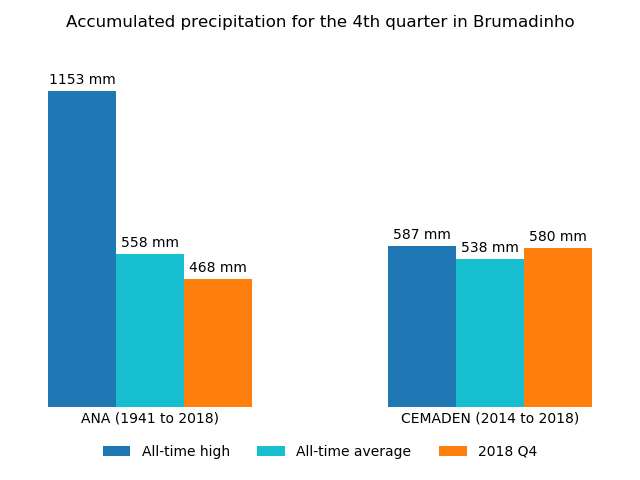

In [24]:
precipitation_fourth_quarter(df_ana, df_cemaden)

CEMADEN data, only available after 2014, form a small sample to generate a relevant statistical value, but because it is an agency created specifically for monitoring natural disasters, we decided to check if the independent panel had used these numbers for make its statement. But the fact is the rains of the last quarter of 2018, recorded by CEMADEN, were only 7.8% above the average. For ANA data, 2018 records were even lower than average. Therefore, we have sufficient evidence to affirm that the information conveyed in the report is hardly true.

**- Has rainfall increased in the years that followed 2016?**

Next, I want to validate the statement that the collapse “followed a number of years of increasing rainfall after tailings deposition ceased in July 2016” and for that I’m going to use the chart with the accumulated annual precipitation in Brumadinho since the beginning of ANA’s station measurements.

<IPython.core.display.Javascript object>


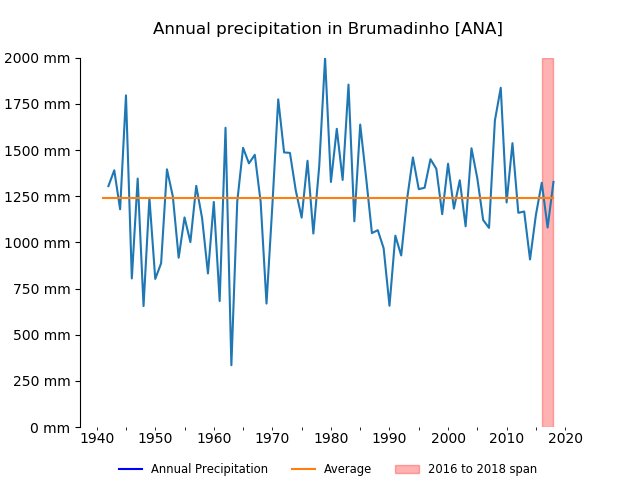

In [25]:
precipitation_by_year(df_ana)

Again, it is not possible to notice any significant increase in the volume of annual precipitation in the region. Being quite strict, the volume was actually lower in the year following the end of tailings deposition.

**- Were there unexpected rain patterns that could have impacted the rupture of Brumadinho’s dam?**

Finally, in order to understand if any meteorological anomaly hit the region in the months that preceded the disaster, I’m going to use the charts with precipitation profile of the region of the dam.

<IPython.core.display.Javascript object>


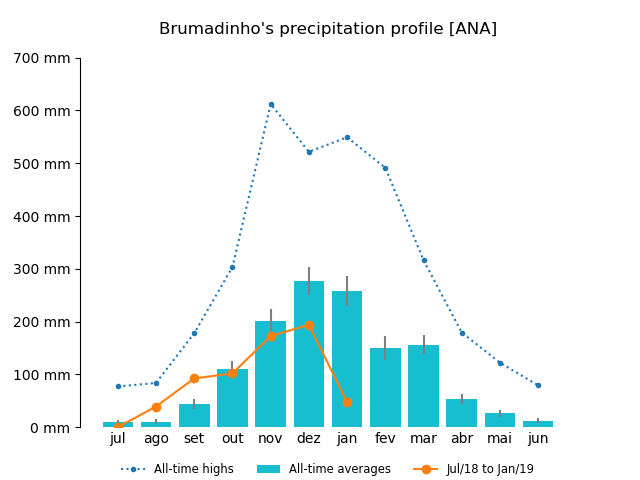

In [26]:
precipitation_profile(df_ana)

<IPython.core.display.Javascript object>


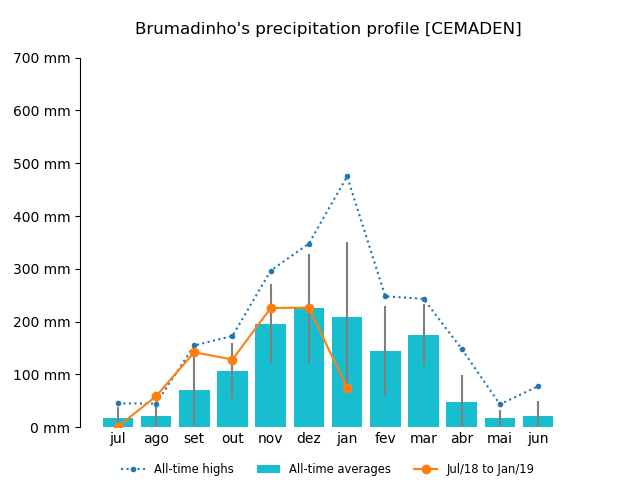

In [27]:
precipitation_profile(df_cemaden)

_*It is worth noting that the standard error for CEMADEN data is much larger than that of ANA data, which was to be expected, since the sample is much smaller._

The first analysis we should do is to compare the records from July 2018 to January 2019 and the historical averages. The charts show that, of the 7 months prior to the disaster, only August and September showed rains consistently above average, but even so at levels that do not even reach half the historical average of the wettest month, for example. October and November were within the average, fluctuating to more or less depending on the dataset but still within the margins of error. However, December and mainly January, typically the wettest months, had considerably below average rainfall at the turn of 2019.

## Conclusion

Throughout this article, we used rainfall data to analyze the possible impact of the amount of rain in one of the greatest natural disasters in world’s history, and we could see that:

- The measured rainfall for the end of 2018 was close to the average
- There’s no evidence of rainfall increasing after 2016
- The wettest months for the region even had bellow average precipitation levels just before the disaster

That said, if we are going to make an analysis purely from the perspective of the search for the cause of the tragedy, we must emphasize that **the amount of rain should not be considered a causative factor for the disaster** since there were no anomalies and, since the beginning, the most conservative security parameters should have been adopted when dealing with a structure with such potential for destruction.

## External links

1. <a name="link1"></a>"Heavy rain, design and poor drainage factors in Vale dam breach", Financial Times. https://www.ft.com/content/e805b142-1cde-11ea-97df-cc63de1d73f4
2. <a name="link2"></a>"‘Vale ended our lives’: Broken Brumadinho a year after dam collapse", BBC. https://www.bbc.com/news/world-latin-america-51220373
3. <a name="link3"></a>"Mine Tailings Storage: Safety Is No Accident", United Nations. http://www.grida.no/publications/383
4. <a name="link4"></a>"Tragédia com barragem da Vale em Brumadinho pode ser a pior no mundo em 3 décadas", BBC Brasil. https://www.bbc.com/portuguese/brasil-47034499
5. <a name="link5"></a>"Report of the Expert Panel on the Technical Causes of the Failure of Feijão Dam I". https://bdrb1investigationstacc.z15.web.core.windows.net/assets/Feijao-Dam-I-Expert-Panel-Report-ENG.pdf
6. <a name="link6"></a>Melo Franco station data from ANA's SNIRH. http://www.snirh.gov.br/hidroweb/rest/api/documento/convencionais?tipo=3&documentos=2044008
7. <a name="link7"></a>CEMADEN stations data. http://www.cemaden.gov.br/mapainterativo/download/downpluv.php
8. <a name="link8"></a>"DIRETRIZES E ANÁLISES RECOMENDADAS PARA A CONSISTÊNCIA DE DADOS PLUVIOMÉTRICOS". http://arquivos.ana.gov.br/infohidrologicas/cadastro/DiretrizesEAnalisesRecomendadasParaConsistenciaDeDadosPluviometricos-VersaoJan12.pdf
9. <a name="link9"></a>"Automatic Pluviometers". https://www.cemaden.gov.br/pluviometros-automatico/